In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import scipy.stats as stats
plt.rcParams.update({'font.size': 22})

The data for this visualizations project comes from Kaggle https://www.kaggle.com/unsdsn/world-happiness

It features World Happinesss Report 2017 which was released at the United Nations International Day of Happiness on March 20. 

*Dystopia*, an imaginary world's least happy country, was introduced in this dataset for the purpose of providing a benchmark for comparison.'The Dystopia Residual metric actually is the Dystopia Happiness Score (1.85) + the Residual value or the unexplained value for each country."

In [2]:
happiness = pd.read_csv('C:\Inna\'s files\data\Happiness\Happiness.csv')
happiness.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [3]:
happiness.rename(columns={'Country':'Country'}, inplace = True)
happiness.rename(columns={'Happiness.Rank': 'Happiness Rank'}, inplace = True)
happiness.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace = True)
happiness.rename(columns={'Whisker.high': 'Whisker high'}, inplace = True)
happiness.rename(columns={'Whisker.low': 'Whisker low'}, inplace = True)
happiness.rename(columns={'Economy..GDP.per.Capita.': 'Economy. GDP per Capita.'}, inplace = True)
happiness.rename(columns={'Family': 'Family'}, inplace = True)
happiness.rename(columns={'Health..Life.Expectancy.': 'Health. Life Expectancy'}, inplace = True)
happiness.rename(columns={'Freedom.': 'Freedom'}, inplace = True)
happiness.rename(columns={'Generosity': 'Generosity'}, inplace = True)
happiness.rename(columns={'Trust..Government.Corruption.': 'Trust. Government. Corruption'}, inplace = True)
happiness.rename(columns={'Dystopia.Residual': 'Dystopia.Residual'}, inplace = True)

In [4]:
happiness.head()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy. GDP per Capita.,Family,Health. Life Expectancy,Freedom,Generosity,Trust. Government. Corruption,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Which countries are the happiest in the world? The following bar chart shows world's top twenty happiest countries.

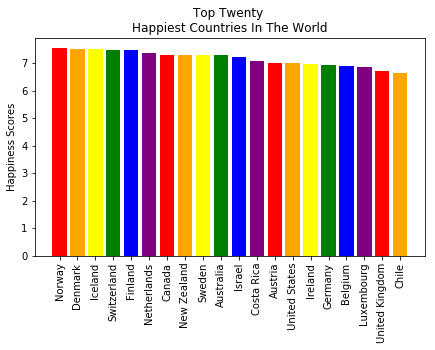

In [5]:
top_twenty = happiness.loc[:, ['Country', 'Happiness Score']].head(20)

plt.figure(figsize=(7,4))
plt.bar(top_twenty['Country'],top_twenty['Happiness Score'], color=['red', 'orange', 'yellow', 'green', 'blue', 'purple'])
plt.xticks(rotation=90)
plt.title('Top Twenty \nHappiest Countries In The World')
plt.ylabel('Happiness Scores')

plt.show()

The distribution of the happiness scores is approximately normal. The Shaprio-Wilk test for normality gives us the p-value of approximately 0.052229.

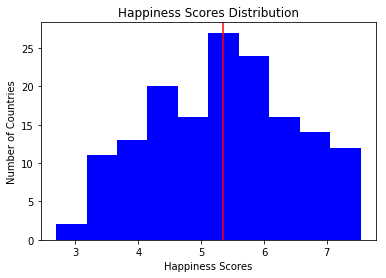

(0.9829196333885193, 0.05222924053668976)
Mean happiness score is 5.354019355773926.


In [6]:
happiness_score = happiness.loc[:, 'Happiness Score']

plt.hist(happiness_score, color='blue')
plt.title('Happiness Scores Distribution')
plt.xlabel('Happiness Scores')
plt.ylabel('Number of Countries')
plt.axvline(happiness_score.mean(), color='r')

plt.show()
print(stats.shapiro(happiness_score))
print('Mean happiness score is {}.'.format(np.mean(happiness_score)))


Another question to investigate is how different factors are correlated with the final happiness score.

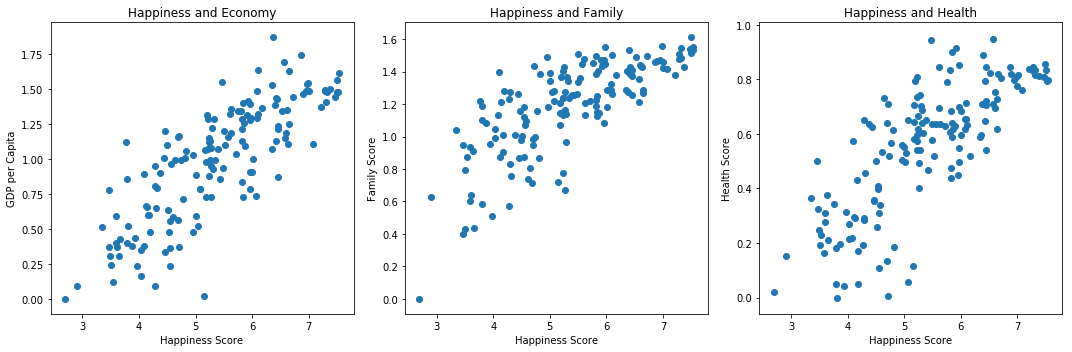

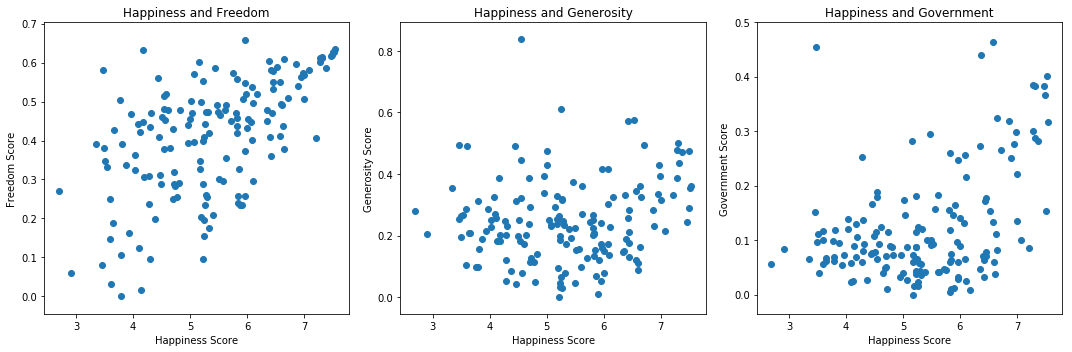

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(131)
economic_factor = happiness.loc[:, ['Happiness Score', 'Economy. GDP per Capita.']]
plt.scatter(x=economic_factor['Happiness Score'], y=economic_factor['Economy. GDP per Capita.'])
plt.title('Happiness and Economy')
plt.ylabel('GDP per Capita')
plt.xlabel('Happiness Score')

plt.subplot(132)
family_factor = happiness.loc[:, ['Happiness Score', 'Family']]
plt.scatter(x=family_factor['Happiness Score'], y=family_factor['Family'])
plt.title('Happiness and Family')
plt.xlabel('Happiness Score')
plt.ylabel('Family Score')

plt.subplot(133)
health_factor=happiness.loc[:, ['Happiness Score','Health. Life Expectancy']]
plt.scatter(x=health_factor['Happiness Score'], y=health_factor['Health. Life Expectancy'])
plt.title('Happiness and Health')
plt.ylabel('Health Score')
plt.xlabel('Happiness Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,5))

plt.subplot(131)
freedom_factor = happiness.loc[:, ['Happiness Score', 'Freedom']]
plt.scatter(x=freedom_factor['Happiness Score'], y=freedom_factor['Freedom'])
plt.title('Happiness and Freedom')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom Score')

plt.subplot(132)
generosity_factor = happiness.loc[:, ['Happiness Score', 'Generosity']]
plt.scatter(x=generosity_factor['Happiness Score'], y=generosity_factor['Generosity'])
plt.title('Happiness and Generosity')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity Score')

plt.subplot(133)
government_factor = happiness.loc[:, ['Happiness Score', 'Trust. Government. Corruption']]
plt.scatter(x=government_factor['Happiness Score'], y=government_factor['Trust. Government. Corruption'])
plt.title('Happiness and Government')
plt.xlabel('Happiness Score')
plt.ylabel('Government Score')

plt.tight_layout()
plt.show()

 Economy, health, and family are much stronger correlated with happiness than freedom, generosity, and confidence in the government. 

Next, we could look at the happiest country in the world, i.e.  **Norway** and see how much does each factor contribute to the its overall happiness score.

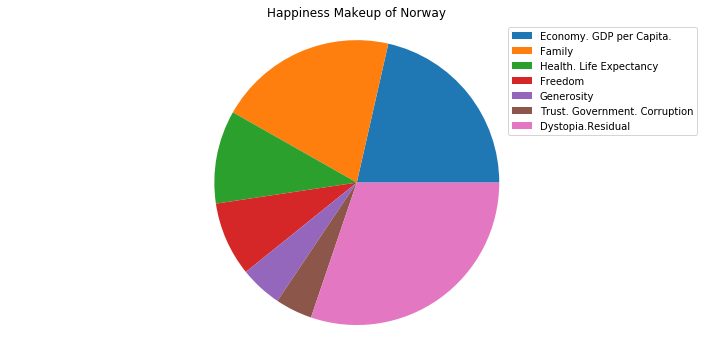

In [8]:
Norway = happiness.iloc[0, 5:]
plt.figure(figsize=(10, 5))
plt.pie(Norway)
plt.axis('equal')
plt.title('Happiness Makeup of Norway')
plt.legend(happiness.columns[5:])

plt.tight_layout()
plt.show()

conomy and Family seem to be significant contributing values. However, the unknown, i.e. Dystopia residual value is very high.

Next, we could turn to least happiest countries which are: 

In [10]:
happiness.tail()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy. GDP per Capita.,Family,Health. Life Expectancy,Freedom,Generosity,Trust. Government. Corruption,Dystopia.Residual
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


The least happiest country on the list is **Central African Republic**.

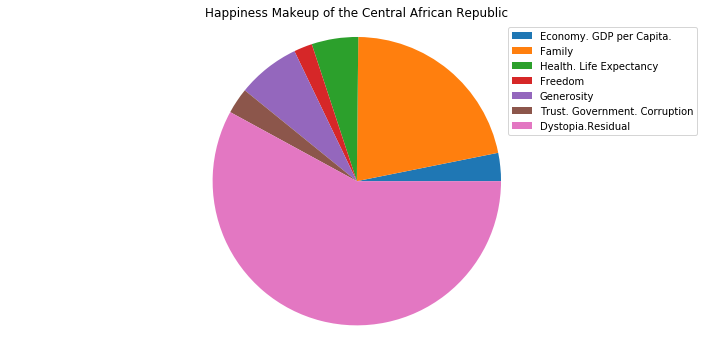

In [11]:
CAR = happiness.iloc[153, 5:]
plt.figure(figsize=(10, 5))
plt.pie(CAR)
plt.axis('equal')
plt.title('Happiness Makeup of the Central African Republic')
plt.legend(happiness.columns[5:])

plt.tight_layout()
plt.show()

Central African Republic(CAR) has much larger Dystopia Residual than Norway. The main factors contributing to happiness in CAR country are family and generosity. The proportion of freedom, trust in the government, and economy are small.